<a href="https://colab.research.google.com/github/kahramankaya/VeriBilimiKucukProje/blob/main/Purchase_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gerekli kütüphaneleri içe aktaralım.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

verileri okuyup biraz gözden geçirelim.

In [ ]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
df.shape

(400, 5)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


normalizasyon yapmadan önce verilerde Null deger yani boş değer olup olmadığına bakalım. varsa onları ortalama ile doldurabiliriz.

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

hedef column verımızı secelım sonra kullanmak ıcın

In [ ]:
y=df.loc[:,"Purchased"]
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: Purchased, dtype: int64

#NORMALİZATİON
**numerıc olan verılerımızı once normalıze ettık. daha sonra kı satırda ıse kategorık olan verılerımı normalıze edecegız.**

In [ ]:
scaler = MinMaxScaler()
sc=scaler.fit(df[["Age","EstimatedSalary"]])
df_norm1=pd.DataFrame(scaler.transform(df[["Age","EstimatedSalary"]]),columns=["Age","EstimatedSalary"])
df_norm1

,Age,EstimatedSalary
0,0.023810,0.029630
1,0.404762,0.037037
2,0.190476,0.207407
3,0.214286,0.311111
4,0.023810,0.451852
...,...,...
395,0.666667,0.192593
396,0.785714,0.059259
397,0.761905,0.037037
398,0.428571,0.133333


kategorik değişkenleri normalize edelim.

In [ ]:
a=df.loc[:,"User ID"]
b=df.loc[:,"Gender"]
c=df.loc[:,"EstimatedSalary"]
le=LabelEncoder()
a1=le.fit_transform(a)
b1=le.fit_transform(b)
c1=le.fit_transform(c)

df_norm2 = pd.concat([pd.DataFrame(a1, columns=['User ID']), pd.DataFrame(b1, columns=['Gender']), pd.DataFrame(c1, columns=['EstimatedSalary'])], axis=1)

df_norm2.head(7)


,User ID,Gender,EstimatedSalary
0,97,1,4
1,392,1,5
2,155,0,26
3,64,0,39
4,382,1,57
5,263,1,40
6,55,0,65


yukarda normalize olmuş kategorık ve numeric verilerimizi tek bir data olarak concat kullanarak birleştirelim.

In [ ]:
df_norm=pd.concat([df_norm1,df_norm2],axis=1)
df_norm

,Age,EstimatedSalary,User ID,Gender,EstimatedSalary
0,0.023810,0.029630,97,1,4
1,0.404762,0.037037,392,1,5
2,0.190476,0.207407,155,0,26
3,0.214286,0.311111,64,0,39
4,0.023810,0.451852,382,1,57
...,...,...,...,...,...
395,0.666667,0.192593,196,0,24
396,0.785714,0.059259,220,1,8
397,0.761905,0.037037,130,0,5
398,0.428571,0.133333,305,1,17


#splitting
verimizi eğitim ve geçici verisi olarak 80-20 oranında ayıralım. amacımız geçici veriyi aşağıda kullanmak o yuzden gecıcı dıye ayırdım.

In [ ]:
x_train,x_temporary,y_train,y_temporary=train_test_split(df_norm,y,train_size=0.8)

şimdi de yukarda geçici verimizi doğrulama ve test verisi olarak ayıralım.

In [ ]:
x_valid,x_test,y_valid,y_test=train_test_split(x_temporary,y_temporary,train_size=0.5)

In [ ]:
print(len(df_norm))
print(len(x_test))
print(len(x_valid))
print("""---------------------------------
---------------------------------""")
print(len(y))
print(len(y_test))
print(len(y_valid))

400
40
40
---------------------------------
---------------------------------
400
40
40


#model mimarisi
**verileri hazırladığımıza göre şimdi model mimarisine geçelim.**

In [ ]:
model = tf.keras.Sequential()

In [ ]:
input_layer=tf.keras.layers.Dense(4096,activation="relu",input_shape=(None, None, 32, 5))
model.add(input_layer)

In [ ]:
model.input_shape

(None, None, None, 32, 5)

In [ ]:
model.build(input_shape=(None, 32, 5))

In [ ]:
model.add(tf.keras.layers.Dense(4096,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(4096,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(4096,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(4096,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
model.add(tf.keras.layers.Dense(6,activation="softmax"))


In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")

In [ ]:
results=model.fit(x_train,y_train,epochs=40,validation_data=(x_valid,y_valid))

Epoch 1/40
10/10 [==============================] - 2s 44ms/step - loss: 40.4983 - accuracy: 0.5344 - val_loss: 0.6616 - val_accuracy: 0.6750
Epoch 2/40
10/10 [==============================] - 0s 25ms/step - loss: 3.0079 - accuracy: 0.5156 - val_loss: 0.6766 - val_accuracy: 0.6250
Epoch 3/40
10/10 [==============================] - 0s 23ms/step - loss: 1.3545 - accuracy: 0.5719 - val_loss: 0.8099 - val_accuracy: 0.5500
Epoch 4/40
10/10 [==============================] - 0s 24ms/step - loss: 1.1102 - accuracy: 0.5656 - val_loss: 0.7161 - val_accuracy: 0.5500
Epoch 5/40
10/10 [==============================] - 0s 23ms/step - loss: 0.9943 - accuracy: 0.5938 - val_loss: 0.7464 - val_accuracy: 0.3750
Epoch 6/40
10/10 [==============================] - 0s 23ms/step - loss: 0.8013 - accuracy: 0.5906 - val_loss: 0.7909 - val_accuracy: 0.4000
Epoch 7/40
10/10 [==============================] - 0s 23ms/step - loss: 0.7884 - accuracy: 0.5938 - val_loss: 0.7142 - val_accuracy: 0.6250
Epoch 8/40
1

grafik yardımı ile eğitim setimiz ve doğrulama setlerimizin epoch(devir) boyunca nasıl değiştiğini görelim.

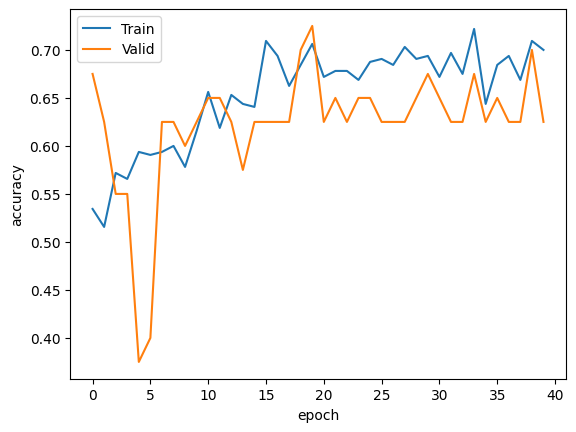

In [ ]:
plt.plot(results.history["accuracy"],label="Train")
plt.plot(results.history["val_accuracy"],label="Valid")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [ ]:
print(model.test_on_batch(x_test,y_test))

[0.7170718908309937, 0.550000011920929]
